# Task 2 - Prediction using Unsupervised ML

## Author: Akshay Verma

### In this task from the given ‘Iris’ dataset, we have to predict the optimum number of clusters and represent it visually.

### Dataset Used : https://bit.ly/3kXTdox

### Importing required libraries

In [45]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
%matplotlib inline

### Importing and understanding dataset

In [32]:
#loading iris dataset
iris=datasets.load_iris()
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [33]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [34]:
#info() method gives information like no of rows and columns in the dataset along with their datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [35]:
#describe() method is used to view the statistical summary of all the numerical cols in the dataset
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
#Check if there are any null values in the dataset
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

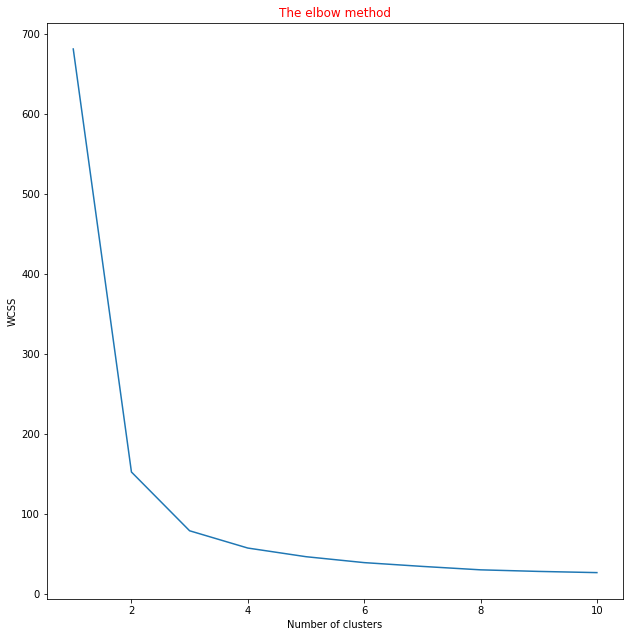

In [46]:
x=iris_df.iloc[:,[0,1,2,3]].values
wcss=[]

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',
                 max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
#plotting the results onto a line graph
# allowing us to observe 'The elbow'
fig=plt.figure(figsize=(20,20))
axes= fig.add_axes([0.4,0.4,0.4,0.4])
axes.plot(range(1,11),wcss)
plt.title("The elbow method",color='Red')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")  #within cluster sum of squares

plt.show()

### Observation:

From above graph we can see that "The elbow method" helps us to find out the optimum number of clusters where the cluster occurs. The Elbow is when the within cluster sum of squares does not deacrease or changes significantly with every iteration.

From above we choose number of clusters as 3.

In [48]:
#Applying kmeans to the dataset/ Creating the kmeans classifier
kmeans=KMeans(n_clusters=3, init="k-means++",
             max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

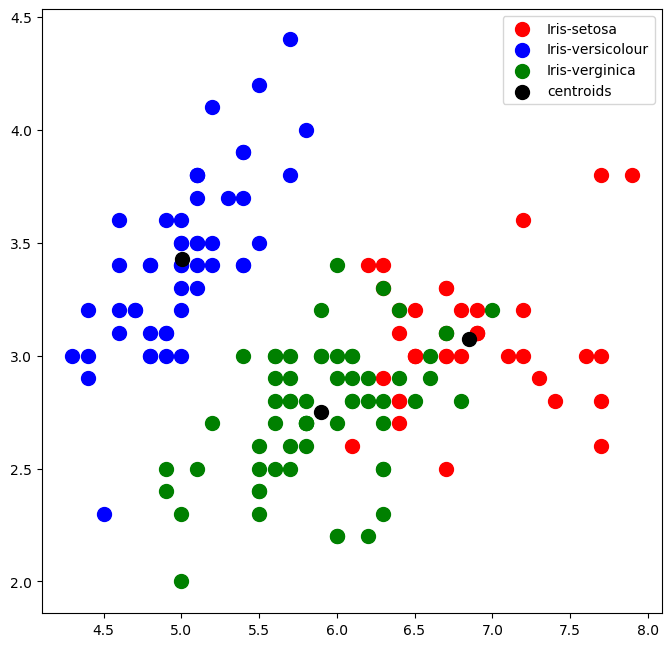

In [49]:
#Visualizing Clusters
plt.figure(figsize=(8,8),dpi=100)
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],
           s=100,c="red",label="Iris-setosa")
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],
           s=100,c="blue",label="Iris-versicolour")
plt.scatter(x[y_kmeans==2,0],x[y_kmeans==2,1],
           s=100,c="green",label="Iris-verginica")

#Plotting centres of the clusters
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],
           s=100,c="Black",label="centroids")

plt.legend()

## Conclusion :

### We have found out total number of optimum clusters is 3 and represent it visually using KMeans Algorithm.